## Standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [2]:
# This is the full dataset 
full_data = pd.read_excel("C:/Users/bodin/School/STAT 5001/project/gl_project_dataset.xlsx")
full_data.head()

,date,away_score,home_score,away_AB,away_H,away_2B,away_3B,away_HR,away_RBI,away_SH,...,home_SF,home_HBP,home_BB,home_IBB,home_K,home_SB,home_CS,home_GIDP,home_CI,home_LOB
0,20000329,5,3,33,12,1,0,2,5,1,...,1,0,3,0,4,0,0,1,0,8
1,20000330,5,1,37,6,2,0,1,5,1,...,0,0,6,1,9,0,0,2,0,10
2,20000403,0,2,31,6,2,0,0,0,1,...,0,1,1,0,6,1,0,1,0,6
3,20000403,3,3,22,7,1,0,0,2,0,...,0,0,1,0,4,0,0,0,0,2
4,20000403,4,6,35,10,2,2,1,4,0,...,0,1,1,0,7,1,0,1,0,8


## Manipulate data

In [3]:
# Reduce data to include only games from the year 2000+
data_reduced = full_data[full_data['date'] > 20000101]     #yyyymmdd

# Only include variables specified in write-up
data = data_reduced[['away_AB', 'away_H', 'away_2B', 'away_3B',
             'away_HR', 'away_SH', 'away_SF', 'away_HBP', 
             'away_BB', 'away_IBB', 'away_K', 'away_SB', 'away_CS', 
             'away_GIDP', 'away_CI', 'away_score', 
             'home_AB', 'home_H', 'home_2B', 'home_3B', 
             'home_HR', 'home_SH', 'home_SF', 'home_HBP', 
             'home_BB', 'home_IBB', 'home_K', 'home_SB', 'home_CS', 
             'home_GIDP', 'home_CI', 'home_score']]

In [4]:
# Ensure no 'na' values
data = data.dropna()

# Add singles column as specified in our write-up
data['away_1B'] = data['away_H'] - data['away_2B'] - data['away_3B'] - data['away_HR']
data['home_1B'] = data['home_H'] - data['home_2B'] - data['home_3B'] - data['home_HR']

In [5]:
# Combine away and home data columns
data2 = pd.DataFrame()

data2['AB'] = pd.concat([data['away_AB'], data['home_AB']], ignore_index=True)
data2['H'] = pd.concat([data['away_H'], data['home_H']], ignore_index=True)
data2['1B'] = pd.concat([data['away_1B'], data['home_1B']], ignore_index=True)
data2['2B'] = pd.concat([data['away_2B'], data['home_2B']], ignore_index=True)
data2['3B'] = pd.concat([data['away_3B'], data['home_3B']], ignore_index=True)
data2['HR'] = pd.concat([data['away_HR'], data['home_HR']], ignore_index=True)
data2['SH'] = pd.concat([data['away_SH'], data['home_SH']], ignore_index=True)
data2['SF'] = pd.concat([data['away_SF'], data['home_SF']], ignore_index=True)
data2['HBP'] = pd.concat([data['away_HBP'], data['home_HBP']], ignore_index=True)
data2['BB'] = pd.concat([data['away_BB'], data['home_BB']], ignore_index=True)
data2['IBB'] = pd.concat([data['away_IBB'], data['home_IBB']], ignore_index=True)
data2['K'] = pd.concat([data['away_K'], data['home_K']], ignore_index=True)
data2['SB'] = pd.concat([data['away_SB'], data['home_SB']], ignore_index=True)
data2['CS'] = pd.concat([data['away_CS'], data['home_CS']], ignore_index=True)
data2['GIDP'] = pd.concat([data['away_GIDP'], data['home_GIDP']], ignore_index=True)
data2['CI'] = pd.concat([data['away_CI'], data['home_CI']], ignore_index=True)
data2['SCORE'] = pd.concat([data['away_score'], data['home_score']], ignore_index=True)

In [6]:
# Split into input and output variables
X = data2.drop('SCORE', axis=1)
y = data2['SCORE']

In [7]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Perform PLS regression

In [9]:
# Initialize model
from sklearn.cross_decomposition import PLSRegression
n = 2     # number of components
pls_model = PLSRegression(n_components=n)

In [10]:
# Train model
pls_model.fit(X_train_scaled, y_train);

In [11]:
# Make predictions
y_pred = pls_model.predict(X_test_scaled)

In [12]:
# Evaluate model
from sklearn.metrics import mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, y_pred)
score = pls_model.score(X_test_scaled, y_test)     #r-squared
print(f"MSE: {mse}")
print(f"Score: {score}")

MSE: 2.436850688824778
Score: -4.57093779576021


C:\Users\bodin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(


In [16]:
# Display coefficients
coefficients = pls_model.coef_
print("PLS Regression Coefficients:")
print(coefficients)

PLS Regression Coefficients:
[[ 0.21158257]
 [ 0.92430962]
 [ 0.31528389]
 [ 0.58525487]
 [ 0.29477831]
 [ 1.26723769]
 [-0.03684185]
 [ 0.39853624]
 [ 0.26211649]
 [ 0.62939149]
 [-0.09858328]
 [-0.23190859]
 [ 0.04850577]
 [-0.11440936]
 [-0.24854019]
 [ 0.04202881]]


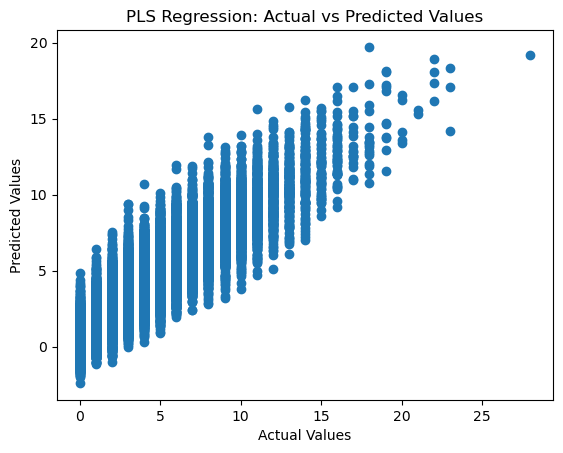

In [13]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PLS Regression: Actual vs Predicted Values')
plt.show()

### CV to optimize model

In [19]:
from sklearn.model_selection import GridSearchCV

pls_model = PLSRegression()

param_grid = {
    'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                    10, 11, 12, 13, 14, 15, 16],  # Example values for the number of components
}

grid_search = GridSearchCV(pls_model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [20]:
# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=PLSRegression(),
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16]},
             scoring='neg_mean_squared_error')

In [21]:

# Get the best parameters and best cross-validated score
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Set: {rmse}')

Best Parameters: {'n_components': 8}
Root Mean Squared Error on Test Set: 1.5078994656694789


## Best PLS model

In [24]:
# Initialize model
from sklearn.cross_decomposition import PLSRegression
n = 8    # number of components
pls_model = PLSRegression(n_components=n)

In [25]:
# Train model
pls_model.fit(X_train_scaled, y_train);

In [26]:
# Make predictions
y_pred = pls_model.predict(X_test_scaled)

In [27]:
# Evaluate model
from sklearn.metrics import mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, y_pred)
score = pls_model.score(X_test_scaled, y_test)     #r-squared
print(f"MSE: {mse}")
print(f"Score: {score}")

MSE: 2.2737607985662995
Score: 0.7762617097640979


In [28]:
# Display coefficients
coefficients = pls_model.coef_
print("PLS Regression Coefficients:")
print(coefficients)

PLS Regression Coefficients:
[[-0.41792762]
 [ 1.19782163]
 [ 0.62340406]
 [ 0.66991588]
 [ 0.30997799]
 [ 1.25843222]
 [-0.04043995]
 [ 0.26351645]
 [ 0.23491873]
 [ 0.71181961]
 [-0.09601049]
 [-0.06469049]
 [ 0.05323452]
 [-0.16692   ]
 [-0.32915631]
 [ 0.03126834]]


C:\Users\bodin\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


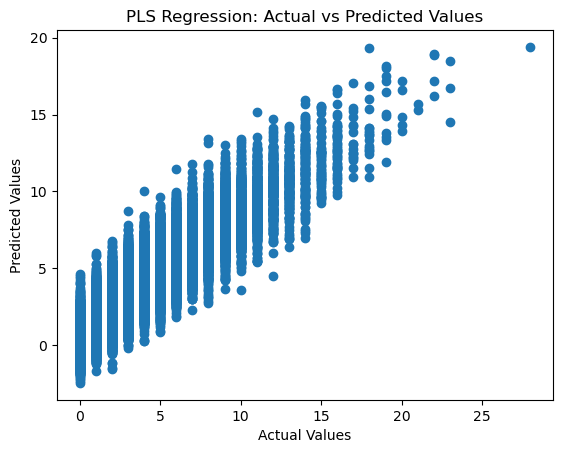

In [29]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PLS Regression: Actual vs Predicted Values')
plt.show()